In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [23]:
def dateparse(date) -> str:
    date = date.split("-")
    return "%s-%s" % (date[0], date[1])

In [24]:
kernels_data = pd.read_csv(
    "data/kaggle_kernels.csv",
    parse_dates=["date"],
    date_parser=dateparse
)

In [30]:
kernels_data.head(5)

,medal,date,source,comments,language,votes
0,gold,2017-02-01,Titanic: Machine Learning from Disaster,601,R,1425
1,gold,2017-02-01,Data Science Bowl 2017,264,Python,1210
2,gold,2017-05-01,Zillow Prize: Zillow’s Home Value Prediction (...,122,R,734
3,gold,2017-04-01,Quora Question Pairs,120,Python,702
4,gold,2016-11-01,Titanic: Machine Learning from Disaster,316,Python,617


In [32]:
languages = kernels_data[["date", "language"]]

In [33]:
languages.head()

,date,language
0,2017-02-01,R
1,2017-02-01,Python
2,2017-05-01,R
3,2017-04-01,Python
4,2016-11-01,Python


In [39]:
languages_graph = languages.groupby(["date","language"]).size().to_frame("Total")
languages_graph.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-04-01</th>
      <td>4.0</td>
      <td>5.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-05-01</th>
      <td>7.0</td>
      <td>4.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-06-01</th>
      <td>13.0</td>
      <td>10.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-07-01</th>
      <td>7.0</td>
      <td>7.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-08-01</th>
      <td>15.0</td>
      <td>5.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

In [47]:
languages_graph_unstacked = languages_graph.unstack()
languages_graph_unstacked.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-04-01</th>
      <td>4.0</td>
      <td>5.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-05-01</th>
      <td>7.0</td>
      <td>4.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-06-01</th>
      <td>13.0</td>
      <td>10.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-07-01</th>
      <td>7.0</td>
      <td>7.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-08-01</th>
      <td>15.0</td>
      <td>5.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

[<matplotlib.text.Text at 0x111ee3be0>, <matplotlib.text.Text at 0x111f5c400>]

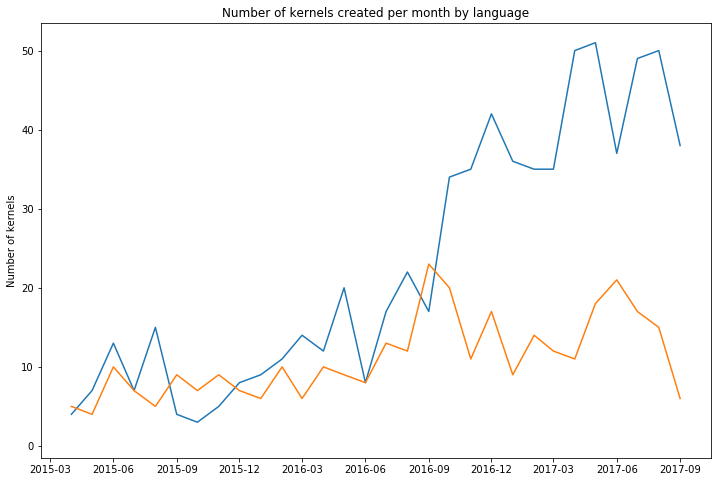

In [48]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(languages_graph_unstacked)
ax.set(title='Number of kernels created per month by language', ylabel='Number of kernels')